# Projeto HealthLab Laboratório

Bibliotecas Utilizadas 

In [1]:
import pandas as pd
import datetime as dt

# To display all the columns of the dataframe in the notebook
# pd.pandas.set_option('display.max_columns', None)

Carregamento das bases 

In [2]:
# Carregando Datasets

df_convenio = pd.read_csv("BaseDados/d_convênio.csv")
df_procedimento = pd.read_csv("BaseDados/d_procedimento.csv")
df_recepcionista = pd.read_csv("BaseDados/d_recepcionista.csv")
df_atendimento = pd.read_csv("BaseDados/f_atendimento.csv")


Verificação das bases

In [3]:
# Verificando tamanho dos datasets

print(df_convenio.shape)
print(df_procedimento.shape)
print(df_recepcionista.shape)
print(df_atendimento.shape)


(119, 2)
(1060, 2)
(130, 2)
(653631, 8)


### Lidando com valores faltantes 

Com essa combinação dos métodos isnull()e o sum() podemos identificar onde estão os valores nulos sequenciados por campo em ordem crescente. 

In [4]:
df_atendimento.isnull().sum().sort_values(ascending=False).head()

ID Recepcionista    17204
Data/Hora               0
ID Atendimento          0
ID Paciente             0
Qtde Item               0
dtype: int64

Entender quantos valores nulos estão presentes no dataframe é importantes paras as análises futuras. 
Nesse caso, temos duas opções: </b>

1ª opção: Retirar os valores nulos </b>

Podemos usar a função dropna para removers os valores nulos encontrados.

In [5]:
df = df_atendimento.copy()
df.dropna(inplace=True)
df.head(2)

,Data/Hora,ID Atendimento,ID Paciente,Qtde Item,Valor,ID Convênio,ID Procedimento,ID Recepcionista
0,"2021-07-01 09:27:03,000",1O1X89XX,D776T7,1,"2,8",14,2,32.0
1,"2021-07-03 06:39:01,000",1O1X9069,TV9V7T,1,"2,8",14,2,32.0


2ª opção: substituir os valores nulos por outros valores </b>

Podemos usar a função fillna para substituir todos os valores nulos encontrados.

In [6]:
data_fill = df_atendimento.copy()
data_fill.fillna(0, inplace=True)
data_fill.head(2)

,Data/Hora,ID Atendimento,ID Paciente,Qtde Item,Valor,ID Convênio,ID Procedimento,ID Recepcionista
0,"2021-07-01 09:27:03,000",1O1X89XX,D776T7,1,"2,8",14,2,32.0
1,"2021-07-03 06:39:01,000",1O1X9069,TV9V7T,1,"2,8",14,2,32.0


In [7]:
# Nesse caso vamos substiuir os valores nulos 

df_atendimento.fillna(0, inplace=True)
print(df_atendimento.shape)

(653631, 8)


In [8]:
# Verificação do tipo de cada coluna --> obs: objeto é texto

df_atendimento.dtypes


Data/Hora            object
ID Atendimento       object
ID Paciente          object
Qtde Item             int64
Valor                object
ID Convênio           int64
ID Procedimento       int64
ID Recepcionista    float64
dtype: object

In [9]:
# Fazendo o tratamento dos tipos de dados 

df_atendimento["Valor"] = df_atendimento["Valor"].apply(lambda x: x.replace(",", "."))
df_atendimento["Data/Hora"] = df_atendimento["Data/Hora"].apply(lambda x: x.replace(",000", ""))


In [10]:
# Convertendo os campos para o tipo correto 

df_atendimento["Valor"] = df_atendimento["Valor"].apply(lambda x: float(x))
df_atendimento["ID Recepcionista"] = df_atendimento["ID Recepcionista"].apply(lambda x: int(x))


### Visualizando dados estatísticos

Podemos usar o _describe()_ pra obter os principais valores estatísticos, para visualizar os resultados mais claros podemos visualizar a transposta. 

In [11]:
df_atendimento.describe().T

,count,mean,std,min,25%,50%,75%,max
Qtde Item,653631.0,1.000041,0.014265,0.0,1.00,1.0,1.00,5.0
Valor,653631.0,14.440629,30.789474,0.0,2.81,6.8,15.82,2800.0
ID Convênio,653631.0,15.329158,17.007695,1.0,7.00,13.0,15.00,110.0
ID Procedimento,653631.0,75.830138,90.522596,1.0,10.00,69.0,98.00,972.0
ID Recepcionista,653631.0,50.935771,33.033823,0.0,25.00,43.0,88.00,124.0


### Correlação entre os dados #

A análise de correlação é uma forma descritiva que mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra. O coeficiente de Pearson, também chamado de “coeficiente de correlação produto-momento” ou chamado de “ρ de Pearson”, mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

Como podemos interpretar os valores*  que ρ pode assumir?

ρ = 0,9 a 1 : correlação muito forte; 

ρ = 0,7 a 09 : correlação forte;

ρ = 0,5 a 0,7 : correlação moderada;

ρ = 0,3 a 0,5 : correlação fraca;

ρ = 0 a 0,3 : não possui correlação.

_* Valores positivos ou negativos_

Em python, para verificar a correlação usamos a biblioteca _seaborn_. Para a análise de correlação vamos utilizar a função .corr(). Para visualizarmos a matriz de correlação, vamos utilizar a função _.heatmap()_ do pacote seaborn, essa função vai nos retornar uma forma gráfica da matriz com uma escala de cor em conjunto com uma escala numérica, as quais vão indicar o grau medido entre as variáveis.

<Axes: >

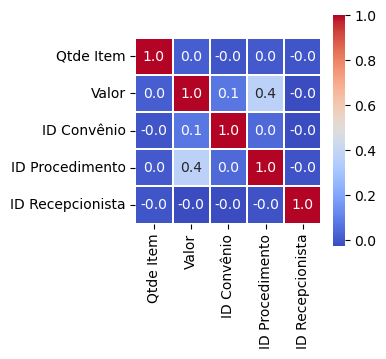

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(3, 3)) 
sns.heatmap(data=df_atendimento.corr(numeric_only = True),annot=True, fmt=".1f", linewidths=0.2,cmap='coolwarm', square=True)

#### Lista das categorias de dados dentro de cada feature

In [13]:
# Verificar X é nosso dataframe

for col_name in df_atendimento.columns:
    if df_atendimento[col_name].dtypes == 'object':
        unique_cat = len(df_atendimento[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Data/Hora' has 53255 unique categories
Feature 'ID Atendimento' has 53785 unique categories
Feature 'ID Paciente' has 35222 unique categories


### Separando dados categóricos de numéricos

In [14]:
# listando features categoricas e numéricas:
categorical_attributes = list(df_atendimento.select_dtypes(include=['object']).columns)
numerical_attributes = list(df_atendimento.select_dtypes(include=['float64', 'int64']).columns)

print('Categorical_attributes: ', categorical_attributes)
print('\nNumerical_attributes: ', numerical_attributes)

Categorical_attributes:  ['Data/Hora', 'ID Atendimento', 'ID Paciente']

Numerical_attributes:  ['Qtde Item', 'Valor', 'ID Convênio', 'ID Procedimento', 'ID Recepcionista']


### Salvando os dados para consulta no power bi

Após a exploração e tratamento dos dados, vamos salvá-los para consulta no power BI 

In [16]:

df_atendimento.to_excel('DadosTratados/df_atendimento.xlsx', index=False)
df_convenio.to_excel('DadosTratados/df_convenio.xlsx', index=False)
df_procedimento.to_excel('DadosTratados/df_procedimento.xlsx', index=False)
df_recepcionista.to_excel('DadosTratados/df_recepcionista.xlsx', index=False)
